# 関連性

統計での興味の一つは，取得した標本群の間にどういう関係があるか，ということだろう．この節では関連性を中心に説明していく．

## 相関係数 (Correlation Coefficient)


屋久島の降雨量と，お隣の種子島の降雨量には関係があるだろうか？ 鹿屋と志布志ではどうだろう．もっと離れた札幌では？

kagoshima-rain-month.txt の11列目が屋久島，3列目が種子島，8列目が鹿屋，10列目が志布志の降雨量になっている．
札幌の降水量は sapporo-rain-month.txt にある．
とりあえずグラフを描いてみよう．


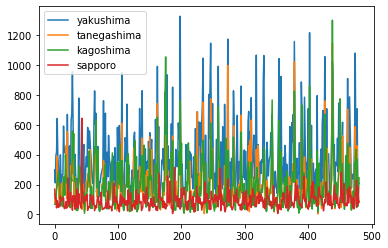

In [1]:
import numpy as np
from matplotlib import pyplot 
%matplotlib inline

yakushima = np.loadtxt("./dat/kagoshima-rain-month.txt", usecols=11)
tanegashima = np.loadtxt("./dat/kagoshima-rain-month.txt", usecols=2)
kagoshima = np.loadtxt("./dat/kagoshima-rain-month.txt", usecols=6)
sapporo = np.loadtxt("./dat/sapporo-rain-month.txt", usecols=1)

pyplot.plot(yakushima, label="yakushima")
pyplot.plot(tanegashima, label="tanegashima")
pyplot.plot(kagoshima, label="kagoshima")
pyplot.plot(sapporo, label="sapporo")
pyplot.legend()
pyplot.show()


なんだかよく分からない．関連があるような気もするし，しない気もする．相関があるかどうかを見るときはグラフなら散布図，数値的に評価するには相関係数を使う．相関係数はNumpyの`corrcoef()`で計算できる．

/home/tsuchiya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


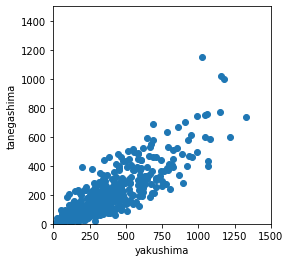

/home/tsuchiya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


0.8286176709903404


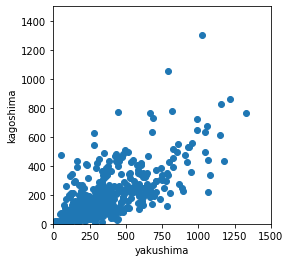

0.6644666415871308


/home/tsuchiya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


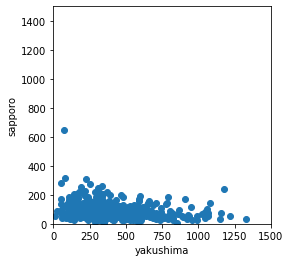

-0.21959454605427697


In [2]:
pyplot.xlabel("yakushima")
pyplot.xlim([0, 1500])
pyplot.ylabel("tanegashima")
pyplot.ylim([0, 1500])
pyplot.axes().set_aspect('equal')
pyplot.scatter(yakushima, tanegashima)
pyplot.show()
print(np.corrcoef(yakushima, tanegashima)[0][1])

pyplot.xlabel("yakushima")
pyplot.xlim([0, 1500])
pyplot.ylabel("kagoshima")
pyplot.ylim([0, 1500])
pyplot.axes().set_aspect('equal')
pyplot.scatter(yakushima, kagoshima)
pyplot.show()
print(np.corrcoef(yakushima, kagoshima)[0][1])

pyplot.xlabel("yakushima")
pyplot.xlim([0, 1500])
pyplot.ylabel("sapporo")
pyplot.ylim([0, 1500])
pyplot.axes().set_aspect('equal')
pyplot.scatter(yakushima, sapporo)
pyplot.show()
print(np.corrcoef(yakushima, sapporo)[0][1])

相関係数 (ピアソンの積率相関係数) $r$は次の式で定義される．
$$r=\frac{\sum_{i=1}^N\left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sqrt{\sum_{i=1}^N\left(x_i - \bar{x}\right)^2\sum_{i=1}^N\left(y_i - \bar{y}\right)^2}}$$
別の書き方をすると
$$r = \frac{\sum_{i=1}^N\left(Z_{x,i}Z_{y,i}\right)}{N-1}$$
$Z$はZスコア．

他にスピアマンの順位相関係数，ケンドールの順位相関係数などもある．

相関に関する議論で注意する必要があるのは，非線形な相関がある場合である．
「相関」という用語は，確率変数同士の線形関係に限定した用語ではない．JISでは「相関」は「二つの確率変数の分布法則の関係。**多くの場合**，線形関係の程度を指す。」とされている．これに対して，相関係数は**線形関係の強さ**の指標になっている．

例えば $\theta$ と $\sin(\theta)$，$\cos(\theta)$ の相関係数を計算するとどうなるだろうか？


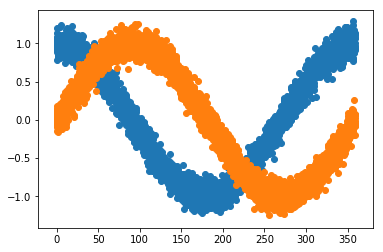

-0.010206423663194582
-0.7693661216453651


In [3]:
import math
import random

x = []
cos = []
sin = []

for loop in range(10):
    for t in range(0,360):
        x.append(t)
        cos.append(math.cos( math.radians(t)) + random.gauss(0, 0.1) )
        sin.append(math.sin( math.radians(t)) + random.gauss(0, 0.1) )
    
pyplot.scatter(x,cos)
pyplot.scatter(x,sin)
pyplot.show()

print(np.corrcoef(x, cos)[0][1])
print(np.corrcoef(x, sin)[0][1])



$\theta$と$\cos(\theta)$の相関係数は0だが$\sin(\theta)$との相関係数は $-0.78$になる．

また，次のような例でも相関係数は0になる．

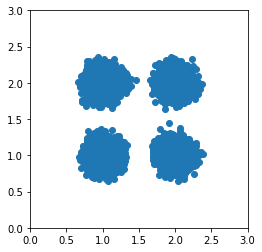

0.0005102220211896712


In [4]:
import random

x = []
y = []

for i in range(20000):
    x.append(random.gauss(0,0.1) + random.randint(0,1) + 1)
    y.append(random.gauss(0,0.1) + random.randint(0,1) + 1)

pyplot.xlim([0, 3])
pyplot.ylim([0, 3])
pyplot.axes().set_aspect('equal')
pyplot.scatter(x,y)
pyplot.show()

print(np.corrcoef(x, y)[0][1])

$x$と$y$に何らかの関連がありそうだが，相関係数は0なのである．

### 相関係数とサンプル数

線形の関係に話を戻して，相関係数はどのぐらいの値であれば統計的に有意な相関があると言えるだろうか．
相関係数がどの程度の大きさであればよいかは，サンプル数に依存する．
サンプル数が少ないときは，たまたま相関があるように見えてしまうことがあるので，大きな相関係数でなければ有意とは言えない．
相関のない2つの変数でサンプル数を変えながら相関係数を計算してみよう．

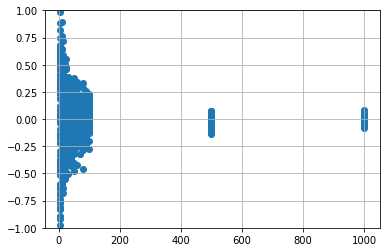

In [5]:
samples = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000]
#samples = [1000, 5000, 10000]
s = []
r = []

Trial = 100

for Ns in samples:
    for t in range(Trial):
        x = []
        y = []
        for i in range(Ns):
            x.append(random.randint(0,100))
            y.append(random.randint(0,100))
        
        s.append(Ns)
        r.append(np.corrcoef(x,y)[0][1])

pyplot.ylim([-1,1])
pyplot.grid()
pyplot.scatter(s, r)
pyplot.show()


xとyは乱数なので当然ながら本来の相関係数は0である．しかし，サンプル数が小さいときには相関係数が$-1$から$1$まで様々な値を取る．サンプル数を増やしていくとこの偶然による相関係数は小さくなっていくが，サンプル数100でも 0.25程度の相関係数は残る．サンプル数と，有意と見なしてよい相関係数の関係は下の表のようになる (出典：Statistics Hacks)．

|サンプルサイズ|有意と見なせる最小の相関係数|
|:------------:|:---------------------:|
|5|0.88|
|10|0.63|
|15|0.51|
|20|0.44|
|25|0.40|
|30|0.38|
|60|0.26|
|100|0.20|

屋久島の降水量と種子島の降水量はサンプル数482で相関係数 0.83だから，これは高い相関がある．屋久島と鹿児島の相関係数は0.66 で種子島よりは低いが，この相関は偶然というわけではなくちゃんと意味のある相関がある，ということだ．
屋久島と札幌は一見すると相関がないように見えるが，サンプル数482で相関係数$-0.22$というのは何らかの有意な相関があるということを示しており，
全くの無相関ではないということが分かる．

## 回帰直線

変数の間に相関があるとき，片方が分かれば他の変数を予測することができる．


#### メモ：「回帰」ってどこに帰るのか？

回帰 (regression) は「元の状態に戻る」
平均への回帰 (regression toward the mean)

### 単純回帰 (Simple Linear Regression)

$$基準変数 = 定数 + (予測変数 \times 重み付け)$$
$$重み付け = 相関係数 \times \frac{基準変数の標準偏差}{予測変数の標準偏差}$$
$$定数 = 基準変数の平均値 - (重み付け \times 予測変数の平均値)$$


### 最小二乗法 (Least Squares Method)

自分で書くのは面倒なので，`scipy` の `optimize` を使う．
`statsmodels`の `OLS()` (Ordinary Least Squares) を使うという手もある．

y = 26.92 + 0.47 x
y = -16.75 + 0.58 x


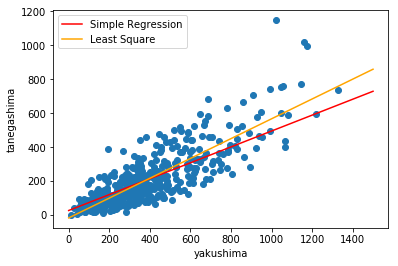

In [7]:
### Simple Linear Regression
mean_yaku = yakushima.mean()
mean_tane = tanegashima.mean()
sigma_yaku = yakushima.std()
sigma_tane = tanegashima.std()
r = np.corrcoef(yakushima, kagoshima)[0][1]

weight = r * sigma_tane / sigma_yaku
offset = mean_tane - (weight * mean_yaku)
print("y = %.2f + %.2f x" % (offset, weight))
xs = range(1500)
ys = offset + weight * xs

### Least Squares
import scipy.optimize

def fit_func(param,x,y):
    a = param[0]
    b = param[1]
    residual = y-(a*x+b)
    return residual

init_param = [0.,0.]
result = scipy.optimize.leastsq(fit_func, init_param, args=(yakushima, tanegashima))
a_fit = result[0][0]
b_fit = result[0][1]
print("y = %.2f + %.2f x" % (b_fit, a_fit))

xls = range(1500)
yls = b_fit + a_fit * xls

### plot
pyplot.xlabel("yakushima")
pyplot.ylabel("tanegashima")
pyplot.scatter(yakushima, tanegashima)
pyplot.plot(xs,ys,color="red", label="Simple Regression")
pyplot.plot(xls,yls,color="orange", label="Least Square")
pyplot.legend()
pyplot.show()


単純回帰と最小二乗法は実はけっこうずれる．相関の傾向から大きくはずれた点がある場合に，それらの点が近似式に与える影響が違うことなどが原因である．

### 重回帰


## 偶然かどうかの判定 ー カイ2乗検定

カイ2乗検定は，以下のカイ2乗値を計算して，その値の大きさで仮説を棄却すべきかどうか判定する方法である．
$$\chi^2 = \sum\frac{\left(Observed - Expected\right)^2}{Expected}$$
Observed は観測された値，Expected は期待度数．期待値ではなく，「仮説通りであればこうなるだろう」の値にすることが多い．

サイコロで$\chi^2$値を計算してみよう．正しいサイコロではなく1の出る確率を操作できるサイコロにしておく．prob1 が1の出る確率で，それ以外の目は均等に出るものとする．

In [12]:
import random

prob1 = 0.17
probo = (1 - prob1) / 5.0

Ns = 10000
res = [0,0,0,0,0,0]
chi2 = 0

for i in range(Ns):
    df = random.random()
    for d in range(6):
        if (df < prob1 + probo * (d)):
            res[d] += 1
            break

for d in range(6):
    chi2 += (res[d] - Ns/6)**2 / (Ns/6)

print(res)
print(chi2)

[1730, 1683, 1649, 1636, 1676, 1626]
4.362799999999999


prob1 や試行回数 $Ns$ を変えると $\chi^2$値は変わる．ではこの値をどう使えばよいかというと，$\chi^2$は p値に変換ができる．面倒なので `scipy.stats.chisquare` を使おう．

In [13]:
import scipy.stats

print(scipy.stats.chisquare(res))


Power_divergenceResult(statistic=4.362799999999999, pvalue=0.4984474112607049)


実際には p値に変換するのではなく，自由度とp値から求められる棄却限界値を使って偶発的なノイズなのか有意な偏りなのかを判定する．

例) 滋賀大学 中川雅央による表:
https://www.biwako.shiga-u.ac.jp/sensei/mnaka/ut/chi2disttab.html

自由度6で有意水準 0.05 のとき，$\chi^2$の棄却水準は 12.6 となる．つまり，上で計算した $\chi^2$の値が 12.6 を超えていれば
95%の確からしさでサイコロに偏りがある (サイコロの目が均等に出るという仮説は棄却される．)

prob1 の値を変えると，0.16～0.17 ぐらいでは $\chi^2$値は小さいが，この範囲を超えると急速に大きな値になることが分かる．



### より正確な方法 ー G検定

カイ2乗検定は計算が簡単だが，実は近似を基にした簡易手法である．対数尤度を近似せずに

$$G = 2\sum Observed\ln\left(\frac{Observed}{Expected}\right)$$

を用いる方がより正確である．ただし標本数が十分であればG検定と$\chi^2$検定は同じ結果になる．


### 二元のカイ2乗検定 (独立性検定)

サイコロの例は一元のカイ2乗検定だったが，2つの項目の間に関連性があるかどうか，を判定するのが二元のカイ2乗検定である．
これは下のような2x2分割表で，2つの項目間の関連性を検定する．

|好み  |男性|女性|合計|
|----  |----|----|----|
|いちご|34|41|75|
|りんご|45|30|75|
|合計|79|71|150|

一元のカイ2乗検定では「男性はいちごよりりんごを好むと言えるかどうか」が検定できる．二元ではこの2x2の表から
「性別と果物の好みに関連性はあるか」を検定することができる．計算自体は一元と同じで，各マスの期待度数を計算して
$\chi^2$を計算すればよい．期待度数は

|好み  |男性|女性|合計|
|----  |----|----|----|
|いちご|39.5|35.5|75|
|りんご|39.5|35.5|75|
|合計|79|71|150|

で，$\chi^2$は 3.24 になる．p=0.05 で棄却限界は 3.84 で，3.24 よりも大きい．
つまりこの分布の偏りは偶然によるものである確率が 5%以上あるので，帰無仮説を棄却しないのが妥当ということになる．



### より正確な方法 ー Fischerの正確確率検定

カイ2乗検定は，期待度数が小さいときに結果が不正確になることが知られている，そのような場合にはより正確な Fischerの正確確率検定を使うべきだ．
Wikipedia によると，おおむね期待度数が 10以下になるような場合にはカイ2乗検定は使わない方がよいらしい．

### シンプソンのパラドックス

## 2つの標本群の比較 ー t検定

ある2つの標本群があったとき，それらの母集団の性質は同じかどうかを知りたいときに使うのが t検定である．

同じ正規分布からサンプリングした場合でも，標本群の分布が等しくなるとは限らない．標本群の平均や標準偏差を求めたとしても，
特にサンプル数があまり大きくないときには偶然によってずれてしまうことがありうる．例えば同じガウス分布の母集団から2つの標本群を作って
その平均値と標準偏差を求めてみると，

In [16]:
sample1 = np.array([])
sample2 = np.array([])

Ns1 = 50
Ns2 = 15

for i in range(Ns1):
    sample1 = np.append(sample1, random.gauss(100,10))
    
for j in range(Ns2):
    sample2 = np.append(sample2, random.gauss(100,10))
    
print("sample1: mu = %.2f / sigma = %.3f" % (sample1.mean(), sample1.std()))
print("sample2: mu = %.2f / sigma = %.3f" % (sample2.mean(), sample2.std()))


sample1: mu = 98.13 / sigma = 9.402
sample2: mu = 101.13 / sigma = 10.869


ずれるときはずれる．この標本群の差が母集団にもあるのか，ただの偶然なのかは以下の t値を計算して判定できる．(この式は分散が等しくない場合でも使える改良版で，ウェルチのt検定と呼ばれる．分散が等しいことを前提とした方は区別するときはスチューデントのt検定と呼ばれる．)
$$t = \frac{\mu_1 - \mu_2}{\sqrt{\frac{\sigma_1^2}{Ns_1} + \frac{\sigma_2^2}{Ns_2}}}$$
実際に計算してみると，


In [17]:
import math

m1 = sample1.mean()
m2 = sample2.mean()
v1 = sample1.var()
v2 = sample2.var()

tvalue = (m1 - m2) / math.sqrt( v1 / Ns1 + v2 / Ns2)

print(tvalue)

-0.9686883733201337


t値が2より小さければ，95%の確率で母集団は同じ平均値をもっていると言える．
(厳密にはサンプルサイズによって変わるが，サンプルサイズが10以下の場合を除いておおむね2が境界値になる．)
